<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/TP_Final_MLIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detección de fraudes con tarjetas de crédito
###Transacciones anónimas con tarjeta de crédito etiquetadas como fraudulentas o auténticas

Es importante que las empresas de tarjetas de crédito sean capaces de reconocer las transacciones fraudulentas con tarjeta de crédito para que no se carguen a los clientes artículos que no compraron.
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Sólo contiene variables de entrada numéricas que son el resultado de una transformación PCA (El PCA es una técnica estadística para reducir la dimensionalidad de un conjunto de datos.). Lamentablemente, por motivos de confidencialidad, no podemos facilitar las características originales ni más información sobre los datos. Las características V1, V2, ... V28 son los componentes principales obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' e 'Importe'. La característica "Tiempo" contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La función "Importe" es el importe de la transacción y puede utilizarse para el aprendizaje sensible a los costes en función del ejemplo. La característica "Clase" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Objetivo: Dado que estamos tratando con un conjunto de datos altamente desequilibrado, donde las transacciones fraudulentas representan una pequeña fracción de todas las transacciones, y se busque minimizar los falsos negativos, es decir, la capacidad para atrapar la mayoria de los fraudes, sin dejar muchos sin detectar ¿cómo medirías la capacidad de nuestro modelo?

In [ ]:
#carga de los datos
import gdown

# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/creditcard.csv'  # Cambia 'nombre_de_tu_archivo.csv' según prefieras

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:00<00:00, 190MB/s]


'/content/creditcard.csv'

In [ ]:
#librerias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
#Procesamiento de los datos

# Divide los datos en características (X) y etiquetas (y)
data = pd.read_csv(output)
X = data.drop('Class', axis=1)
y = data['Class']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características para normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

##Mapa de Calor y Matriz de Correlaciones

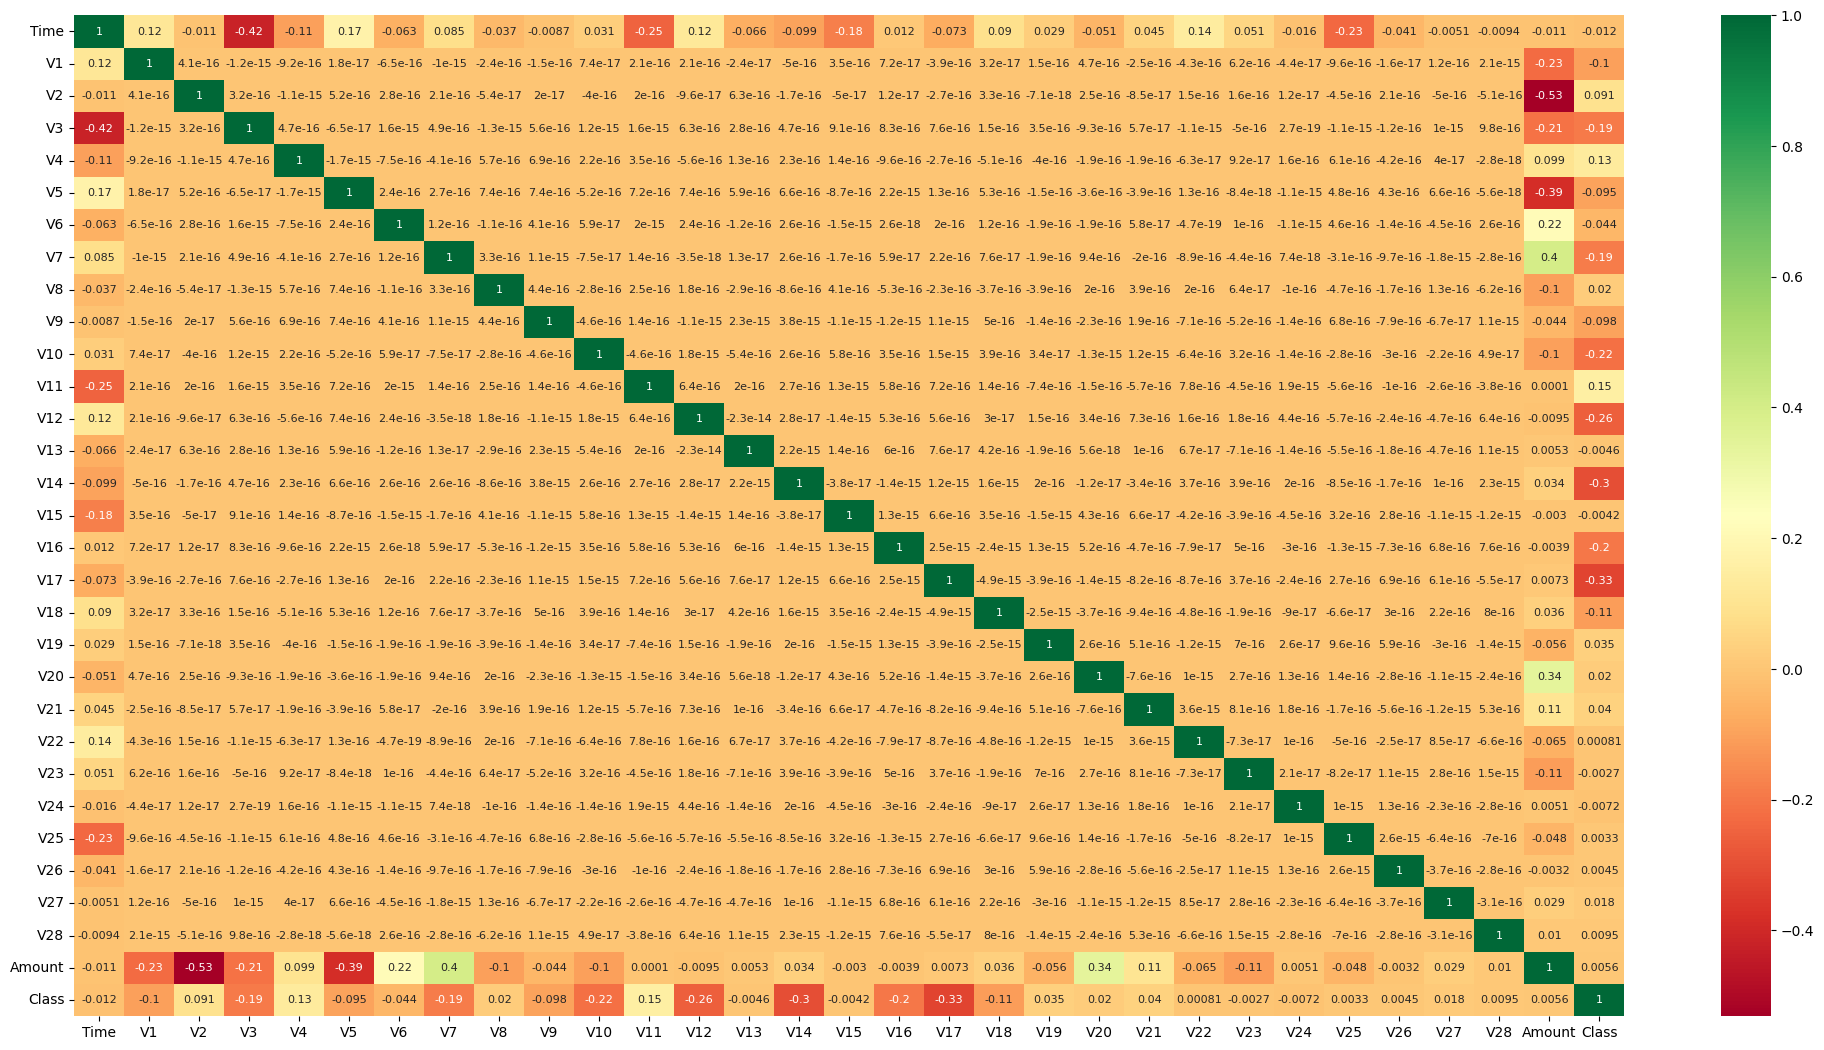

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Configurar el tamaño del mapa de calor
plt.figure(figsize=(25, 13))  # Ajusta el tamaño de la figura

# Crear el mapa de calor de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", annot_kws={"size": 8})  # Ajusta el tamaño del texto

# Mostrar el mapa de calor
plt.show()

In [ ]:
#creacion de la red neuronal y entrenamiento

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo con los datos submuestreados
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
#y_probs = model.predict(X_test)
#y_pred = np.round(y_probs)


Epoch 1/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0048
Epoch 2/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0031
Epoch 3/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0028
Epoch 4/10
7121/7121 [==============================] - 21s 3ms/step - loss: 0.0025
Epoch 5/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0024
Epoch 6/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0023
Epoch 7/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0022
Epoch 8/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0021
Epoch 9/10
7121/7121 [==============================] - 20s 3ms/step - loss: 0.0020
Epoch 10/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0019


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convierte las probabilidades en etiquetas binarias (0 o 1)


# Calcula la matriz de confusión (usando "y_test" y "y_pred")
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión datos desbalanceados:")
print(conf_df)


1781/1781 [==============================] - 3s 2ms/step

Matriz de Confusión datos desbalanceados:
        No  Yes
No   56851   13
Yes     24   74


In [ ]:
#Aplicar Recall como metrica para medir el rendimiento del modelo
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels = [0,1])
print("Metricas datos desbalanceados")
print(report)



Metricas datos desbalanceados
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



#Visualizar el desbalanceo del Dataset


Clase: 0, Cantidad de Datos: 284315
Clase: 1, Cantidad de Datos: 492


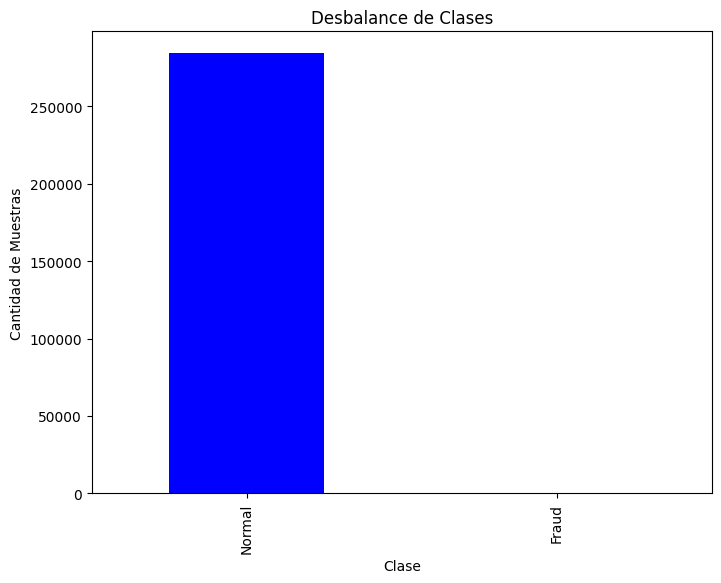

In [ ]:
import matplotlib.pyplot as plt

# Calcular la cantidad de muestras por clase
class_counts = data['Class'].value_counts()

# Mostrar la cantidad de datos por clase
for class_name, count in class_counts.items():
    print(f'Clase: {class_name}, Cantidad de Datos: {count}')

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Desbalance de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Muestras')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()


##Que tecnica para tratar el desbalanceo de datos utilizo

A) Submuestreo

###Que se observan en los datos visualizados?

###Respuesta: ...


Downloading...
From: https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 53.4MB/s]


Epoch 1/10
25/25 [==============================] - 3s 5ms/step - loss: 0.3972
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.2196
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.1617
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.1335
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.1195
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1069
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0986
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0919
Epoch 9/10
25/25 [==============================] - 0s 9ms/step - loss: 0.0837
Epoch 10/10
1781/1781 [==============================] - 9s 5ms/step

Matriz de Confusión:
        No   Yes
No   55273  1591
Yes      8    90

Metricas Habiendo aplicado submuestreo
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     5686

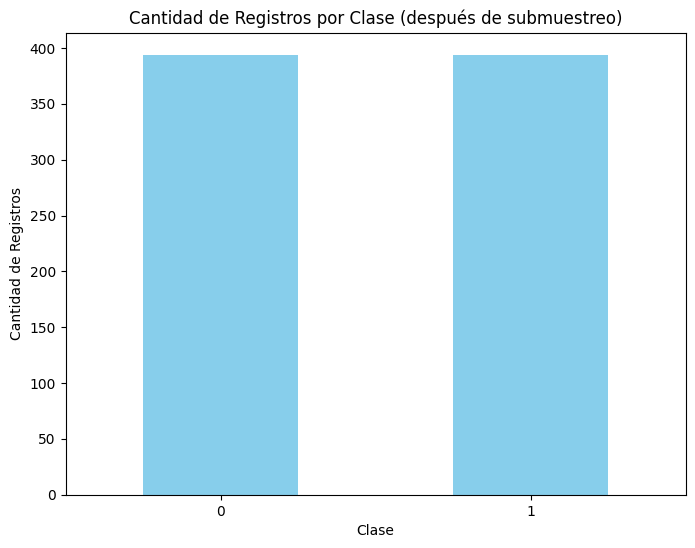

In [ ]:
#carga de los datos
import gdown

# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/creditcard.csv'  # Cambia 'nombre_de_tu_archivo.csv' según prefieras

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)


#librerias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report



#Procesamiento de los datos

# Divide los datos en características (X) y etiquetas (y)
data = pd.read_csv(output)
X = data.drop('Class', axis=1)
y = data['Class']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características para normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar submuestreo a la clase mayoritaria
#El submuestreo aleatorio reduce la cantidad de ejemplos de la clase mayoritaria a un número igual al número
#de ejemplos de la clase minoritaria, seleccionando aleatoriamente ejemplos de la clase mayoritaria sin reemplazo.
#Esto puede ayudar a equilibrar las clases y mejorar el rendimiento de los modelos de aprendizaje automático cuando
#se trata de problemas de desequilibrio de clases.

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


#creacion de la red neuronal y entrenamiento

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo con los datos submuestreados
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convierte las probabilidades en etiquetas binarias (0 o 1)


# Calcula la matriz de confusión (usando "y_test" y "y_pred")
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

#Aplicar Recall como metrica para medir el rendimiento del modelo


report = classification_report(y_test, y_pred, labels = [0,1])
print("")
print("Metricas Habiendo aplicado submuestreo")
print(report)


# Crear un gráfico de barras para mostrar la cantidad de registros por clase después de submuestreo
plt.figure(figsize=(8, 6))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase (después de submuestreo)')
plt.xticks(rotation=0)
plt.show()





mejoro mucho el recall a costa de la precision por lo que la metrica de f1 score tiene valores muy bajos no convenientes.

B) Sobremuestreo

Downloading...
From: https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:01<00:00, 142MB/s]


Epoch 1/10
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0149
Epoch 2/10
14216/14216 [==============================] - 36s 3ms/step - loss: 0.0044
Epoch 3/10
14216/14216 [==============================] - 38s 3ms/step - loss: 0.0031
Epoch 4/10
14216/14216 [==============================] - 36s 3ms/step - loss: 0.0026
Epoch 5/10
14216/14216 [==============================] - 36s 3ms/step - loss: 0.0022
Epoch 6/10
14216/14216 [==============================] - 38s 3ms/step - loss: 0.0016
Epoch 7/10
14216/14216 [==============================] - 36s 3ms/step - loss: 0.0017
Epoch 8/10
14216/14216 [==============================] - 37s 3ms/step - loss: 0.0017
Epoch 9/10
14216/14216 [==============================] - 37s 3ms/step - loss: 0.0014
Epoch 10/10
1781/1781 [==============================] - 4s 2ms/step

Matriz de Confusión:
        No  Yes
No   56824   40
Yes     16   82

Metricas Habiendo aplicado sobremuestreo
              precision    recall  f1-score  

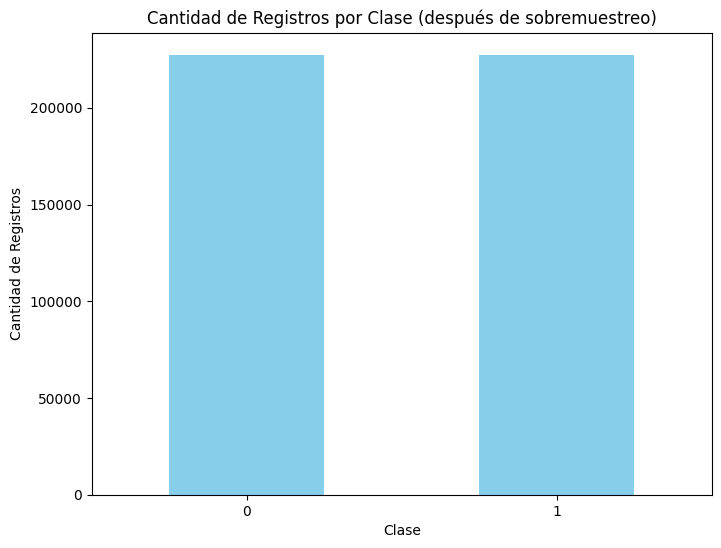

In [ ]:
#carga de los datos
import gdown

# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1hga3zUzjhYqmR_aCpSIhYEktqClCIaV8'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/creditcard.csv'  # Cambia 'nombre_de_tu_archivo.csv' según prefieras

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)


#librerias
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report



#Procesamiento de los datos

# Divide los datos en características (X) y etiquetas (y)
data = pd.read_csv(output)
X = data.drop('Class', axis=1)
y = data['Class']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escala las características para normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Aplicar oversampling utilizando RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


#creacion de la red neuronal y entrenamiento

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo con los datos sobremuestreados
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convierte las probabilidades en etiquetas binarias (0 o 1)


# Calcula la matriz de confusión (usando "y_test" y "y_pred")
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

#Aplicar Recall como metrica para medir el rendimiento del modelo


report = classification_report(y_test, y_pred, labels = [0,1])
print("")
print("Metricas Habiendo aplicado sobremuestreo")
print(report)


# Crear un gráfico de barras para mostrar la cantidad de registros por clase después de submuestreo
plt.figure(figsize=(8, 6))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase (después de sobremuestreo)')
plt.xticks(rotation=0)
plt.show()

##Conclusion

Al necesitar bajar el valor de falsos negativos la metrica mas representativa es la de recall, tomando en cuenta tambien el f1 score para no generar exesoso en el desequilibrio entre la precision y la sensibilidad (recall). Precisamente esto es lo que sucede si utilazamos la tecnica de submuestreo para paliar el desbalanceo de datos.

Por ello observando las metricas concuimos que la mejor tecnica es la de sobremuestreo